<a href="https://colab.research.google.com/github/Prahalad1810/Prahalad1810/blob/main/TensorFlow_vs_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

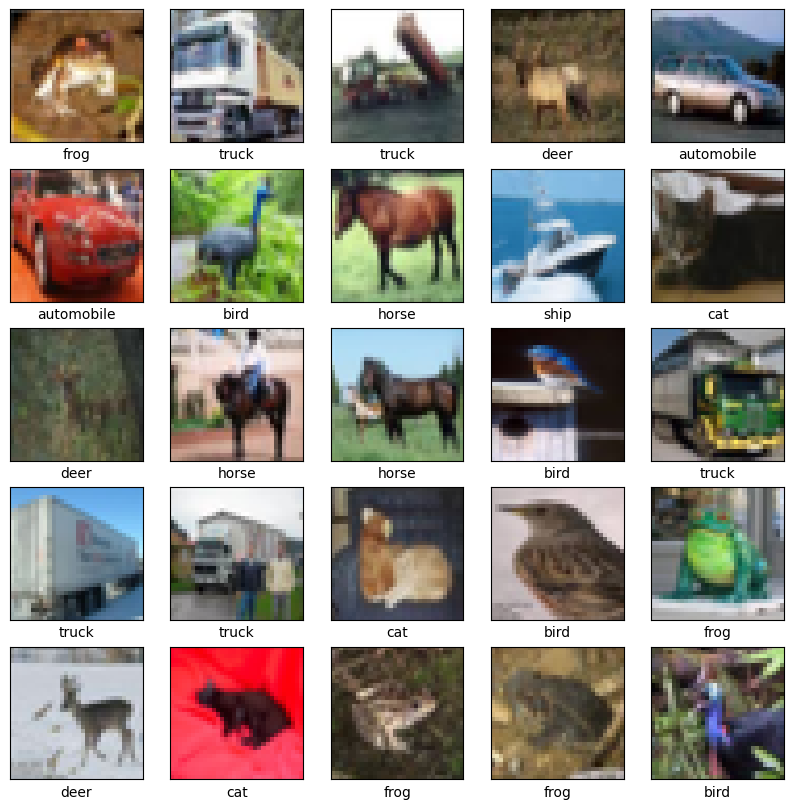

In [26]:
classes = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(classes[train_labels[i][0]])
plt.show()


In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10))

model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = "accuracy")

model.fit(train_images, train_labels, epochs = 10, validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 36s 28ms/step - loss: 1.6278 - accuracy: 0.3978 - val_loss: 1.4059 - val_accuracy: 0.4913
Epoch 2/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.3100 - accuracy: 0.5287 - val_loss: 1.2328 - val_accuracy: 0.5654
Epoch 3/10
1250/1250 [==============================] - 32s 26ms/step - loss: 1.1692 - accuracy: 0.5849 - val_loss: 1.1549 - val_accuracy: 0.5873
Epoch 4/10
1250/1250 [==============================] - 27s 22ms/step - loss: 1.0851 - accuracy: 0.6162 - val_loss: 1.1081 - val_accuracy: 0.6088
Epoch 5/10
1250/1250 [==============================] - 30s 24ms/step - loss: 1.0232 - accuracy: 0.6368 - val_loss: 1.1017 - val_accuracy: 0.6133
Epoch 6/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.9694 - accuracy: 0.6596 - val_loss: 1.0322 - val_accuracy: 0.6377
Epoch 7/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.9223 - accuracy: 0.6723 - val_loss: 1.0341 -

In [28]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print(test_loss, test_accuracy)

313/313 - 2s - loss: 0.9852 - accuracy: 0.6600 - 2s/epoch - 6ms/step
0.9851505756378174 0.6600000262260437


**PyTorch**


In [29]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plot
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [39]:
batch_size = 32

In [40]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)                    #preprocessing input images before feeding them into neural network

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
trainloader = torch.utils.data. DataLoader(trainset, batch_size = batch_size, shuffle =True, num_workers = 2)
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)
testloader = torch.utils.data. DataLoader(testset, batch_size = batch_size, shuffle =False, num_workers = 2)


Files already downloaded and verified
Files already downloaded and verified


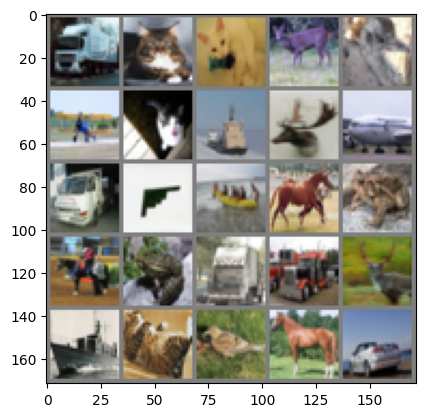

truck cat cat deer bird plane cat ship deer plane truck plane ship horse frog horse frog truck truck deer ship cat bird horse car


In [54]:
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

def imshow(imgs):
  imgs = imgs / 2 + 0.5
  npimgs = imgs.numpy()
  plt.imshow(np.transpose(npimgs, (1, 2, 0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[:25], nrow = 5)
imshow(img_grid)
print(' '.join(f'{classes[labels[j]]}' for j in range(25)))


In [70]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.conv3 = nn.Conv2d(64, 64, 3)
    self.fc1 = nn.Linear(64*4*4, 64)
    self.fc2 = nn.Linear(64, 10)


  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = F.relu(self.conv3(x))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)




In [71]:
steps_per_epoch = len(trainloader)
for epoch in range(10):
  running_loss = 0.0
  for (inputs, labels) in trainloader:
    inputs.to(device)
    labels.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  print(f'[{epoch + 1}] loss: {running_loss/steps_per_epoch:.3f}')
print("training complete")


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[1] loss: 1.465
[2] loss: 1.096
[3] loss: 0.925
[4] loss: 0.818
[5] loss: 0.739
[6] loss: 0.682
[7] loss: 0.629
[8] loss: 0.581
[9] loss: 0.542
[10] loss: 0.504
training complete


In [74]:
n_correct = 0
n_total = 0
model.eval()
with torch.no_grad():
  for (images, labels) in testloader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    n_total += labels.size(0)
    n_correct+= (predicted==labels).sum().item()
print(f'Accuracy on test set: {n_correct/n_total:.3f}')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Accuracy on test set: 0.734
